In [178]:
import os
import sys

# Data Understanding

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/content/gdrive')

info_tourism = pd.read_csv("/content/gdrive/MyDrive/tourism_with_id.csv")
tourism_rating = pd.read_csv("/content/gdrive/MyDrive/tourism_rating.csv")
users = pd.read_csv("/content/gdrive/MyDrive/user.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [180]:
info_tourism.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [181]:
tourism_rating.head(5)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [182]:
users.head(5)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [183]:
print(f"Number of places in the datasets : {len(info_tourism.Place_Id.unique())}")
print(f"Number of users : {len(users.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")
print(f"The number of categories of the place: {len(info_tourism.Category)}")

Number of places in the datasets : 437
Number of users : 300
The number of ratings given by the user to the dataset : 10000
The number of categories of the place: 437


# Data Preprocessing

In [184]:
import numpy as np

tourism_all = np.concatenate((
    info_tourism.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 437


In [185]:
all_tourism_rate = tourism_rating
all_tourism_rate.head(5)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [186]:
all_tourism = pd.merge(all_tourism_rate,info_tourism[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
all_tourism.head(5)

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya


In [187]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)
all_tourism.head(5)

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya


In [188]:
all_tourism.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya


# Data Preparation

## Drop duplicates

In [189]:
preparation= all_tourism.drop_duplicates("Place_Id")
preparation.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya


In [190]:
place_id = preparation.Place_Id.tolist()
place_name = preparation.Place_Name.tolist()
place_category = preparation.Category.tolist()
place_desc = preparation.Description.tolist()
place_city = preparation.City.tolist()
city_category = preparation.city_category.tolist()

In [191]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category
})

tourism_new.head()

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya


# Content Based Filtering

In [192]:
data = tourism_new
data.head(5)

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya


## TF-IDF Vectorizer

In [193]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['city_category'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [194]:
cv_matrix = cv.transform(data['city_category'])

cv_matrix.shape

(437, 15)

In [195]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]])

In [196]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.name
).head(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Candi Ratu Boko,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Pantai Marina,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
Atlantis Water Adventure,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
Museum Kereta Ambarawa,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
Kampung Wisata Sosro Menduran,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


## Cosine Similarity

In [197]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)

In [198]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=data['name'],columns=data['name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

name,Pantai Goa Cemara,Kampung Wisata Sosro Menduran,The Escape Hunt,Museum Sonobudoyo Unit I,Babakan Siliwangi City Forest Path Bandung
name,,,,,
Water Blaster Bukit Candi Golf,0.000000,0.000000,0.666667,0.000000,0.0
Bukit Bintang Yogyakarta,0.408248,0.408248,0.666667,0.408248,0.0
Surabaya Museum (Gedung Siola),0.000000,0.500000,0.000000,0.500000,0.0
Pantai Ngrawe (Mesra),1.000000,0.500000,0.000000,0.500000,0.0
Taman Tabanas,0.000000,0.000000,0.666667,0.000000,0.0
Curug Cimahi,0.000000,0.000000,0.000000,0.000000,1.0
Tugu Proklamasi,0.000000,0.500000,0.408248,0.500000,0.0
Heha Sky View,0.408248,0.408248,0.666667,0.408248,0.0
Jakarta Aquarium dan Safari,0.000000,0.000000,1.000000,0.000000,0.0


## Recommendation

In [199]:
place2name={}
id2category={}
collect_places=[]

from collections import defaultdict

user_place = defaultdict(list)
place_user = defaultdict(list)
user_place_name = defaultdict(list)

for index, row in all_tourism.iterrows():

    user_place[row['User_Id']].append( row['Place_Id'])
    place_user[row['Place_Id']].append( row['User_Id'])
    user_place_name[row['User_Id']].append( row['Place_Name'])
    place2name[row['Place_Id']]=row['Place_Name']
    id2category[row['Place_Id']]=row['Category']

Check users who visited **Taman Harmoni Keputih** and collect their place names.

In [200]:
print('users who visited --- %s ---'%place2name[393]  , place_user[393], '\n')

for u in place_user[393]:

  collect_places.extend( user_place_name[u])


print('All places visitors of --- Taman Harmoni Keputih --- were visited: \n')
print(set( collect_places))

users who visited --- Taman Harmoni Keputih --- [1, 6, 8, 19, 27, 59, 69, 73, 82, 104, 120, 131, 131, 137, 174, 180, 184, 255, 261, 261, 271] 

All places visitors of --- Taman Harmoni Keputih --- were visited: 

{'Upside Down World Bandung', 'Wisata Kraton Jogja', 'Monumen Palagan Ambarawa', 'Tugu Pal Putih Jogja', 'Bukit Panguk Kediwung', 'Ledok Sambi', 'Waduk Jatibarang', 'Plaza Indonesia', 'Hutan Kota Srengseng', 'Kawasan Malioboro', 'Pantai Ngrawe (Mesra)', 'Lembang Park & Zoo', 'Wisata Eling Bening', 'Pulau Pari', 'Taman Kasmaran', 'Kawasan Kuliner BSM', 'Tektona Waterpark', 'Istana Negara Republik Indonesia', 'Monumen Sanapati', 'Pantai Glagah', 'Taman Harmoni Keputih', 'Taman Sejarah Bandung', 'Panama Park 825', 'Museum Seni Rupa dan Kramik', 'Candi Ratu Boko', 'Sendang Geulis Kahuripan', 'NuArt Sculpture Park', 'Curug Dago', 'Wot Batu', 'Waterpark Kenjeran Surabaya', 'Candi Ijo', 'Pantai Maron', 'Kampung Tematik Jawi', 'Bunker Kaliadem Merapi', 'Taman Mini Indonesia Indah (TMI

In [201]:
def tourism_recommendations(place_name,similarity_data=cosine_sim_df,items=data[['name','category','description','city']],k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(place_name,errors='ignore')

    recommended= closest.to_list()

    return  recommended #pd.DataFrame(closest).merge(items).head(k),

## Content Based Evalutation

In [228]:
recom= tourism_recommendations("Taman Harmoni Keputih")
print('recommendation for the place: Taman Harmoni Keputih \n')

for i in recom:
  print(i)

recommendation for the place: Taman Harmoni Keputih 

Kebun Binatang Surabaya
Kebun Bibit Wonorejo
Ekowisata Mangrove Wonorejo
Hutan Bambu Keputih
Air Terjun Semirang


In [229]:
print('Which of recommendations are in the visited list of other users: \n')

visited_places_by_users= set()

for p in set( collect_places):
  if p in recom:
    visited_places_by_users.add(p)
    print(p)

Which of recommendations are in the visited list of other users: 

Hutan Bambu Keputih
Kebun Binatang Surabaya
Air Terjun Semirang
Kebun Bibit Wonorejo


In [238]:
common_rec = set( visited_places_by_users).intersection(set(recom))
print('number of recommendation', len(recom))
print('number of correct recommendation', len(common_rec))

number of recommendation 5
number of correct recommendation 4


# Collaborative Filtering

In [205]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [206]:
df_colab = tourism_rating
df_colab.head(5)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


## Data Preparation

In [207]:
user_ids = df_colab.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [208]:
place_ids = df_colab.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [209]:
df_colab['user'] = df_colab.User_Id.map(user_to_user_encoded)

df_colab['place'] = df_colab.Place_Id.map(place_to_place_encoded)

In [210]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

df_colab['Place_Ratings'] = df_colab['Place_Ratings'].values.astype(np.float32)

min_rating = min(df_colab['Place_Ratings'])

max_rating= max(df_colab['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


## Train Test Split

In [211]:
df_colab = df_colab.sample(frac=1,random_state=42)
df_colab.head()

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283


In [212]:
x = df_colab[['user','place']].values

y = df_colab['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

## Training

In [213]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.place_embedding = layers.Embedding(
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [214]:
model = RecommenderNet(num_users, num_place, 100)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [215]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
1000/1000 [==============================] - 6s 3ms/step - loss: 0.6964 - root_mean_squared_error: 0.3475 - val_loss: 0.6957 - val_root_mean_squared_error: 0.3467
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6892 - root_mean_squared_error: 0.3423 - val_loss: 0.6955 - val_root_mean_squared_error: 0.3465
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6853 - root_mean_squared_error: 0.3394 - val_loss: 0.6966 - val_root_mean_squared_error: 0.3472
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6789 - root_mean_squared_error: 0.3348 - val_loss: 0.6978 - val_root_mean_squared_error: 0.3480
Epoch 5/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6749 - root_mean_squared_error: 0.3318 - val_loss: 0.6981 - val_root_mean_squared_error: 0.3482
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6735 - root_mean_squared_error: 0.3307 - val_l

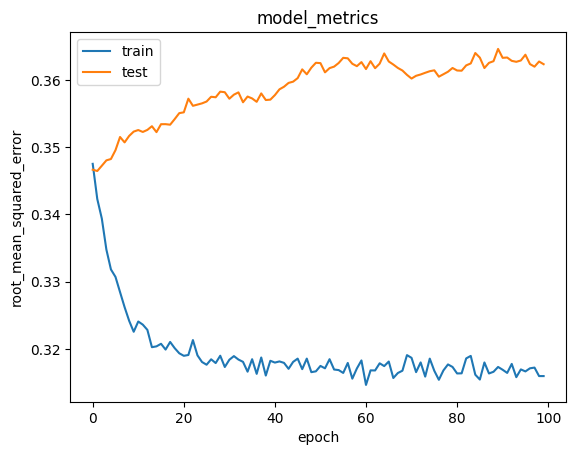

In [216]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Recommendation

In [231]:
place_df = tourism_new
df_tr = pd.read_csv("/content/gdrive/MyDrive/tourism_rating.csv")

user_id = df_tr.User_Id.sample(1).iloc[0]
place_visited_by_user = df_tr[df_tr.User_Id == user_id]

place_visited_by_user.head()

,User_Id,Place_Id,Place_Ratings
6204,187,335,4
6205,187,143,3
6206,187,258,1
6207,187,162,3
6208,187,27,4


In [232]:
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

print(len(place_not_visited))

400


In [233]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

13/13 [==============================] - 0s 2ms/step


In [234]:
print('----' * 8)
print('Top 10 place recommendation for user {}'.format(user_id))
print('----' * 8)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
recommended_place

--------------------------------
Top 10 place recommendation for user 187
--------------------------------


,id,name,category,description,city,city_category
46,167,Geoforest Watu Payung Turunan,Cagar Alam,Bagi para pemburu keindahan matahari terbit ya...,Yogyakarta,Yogyakarta Cagar Alam
51,166,Kebun Teh Nglinggo,Cagar Alam,Wisata Kebun Teh Nglinggo adalah satu-satunya ...,Yogyakarta,Yogyakarta Cagar Alam
170,164,Pintoe Langit Dahromo,Cagar Alam,Pintu Langit Dahromo ini menyediakan berbagai ...,Yogyakarta,Yogyakarta Cagar Alam
219,150,Wisata Kraton Jogja,Budaya,Kraton Jogja adalah sebuah komplek kerajaan ya...,Yogyakarta,Yogyakarta Budaya
226,94,Sumur Gumuling,Taman Hiburan,Sumur Gumuling adalah salah satu tempat untuk ...,Yogyakarta,Yogyakarta Taman Hiburan
363,160,Pasar Kebon Empring Bintaran,Pusat Perbelanjaan,Pasar Kebon Empring merupakan salah satu objek...,Yogyakarta,Yogyakarta Pusat Perbelanjaan
384,157,Pantai Baron,Bahari,Pantai Baron adalah salah satu objek wisata be...,Yogyakarta,Yogyakarta Bahari
403,155,Pantai Ngobaran,Bahari,Pantai Ngobaran merupakan salah satu tempat wi...,Yogyakarta,Yogyakarta Bahari
422,232,Bukit Moko,Cagar Alam,Bandung sebagai destinasi wisata tak pernah ad...,Bandung,Bandung Cagar Alam
423,314,Tafso Barn,Cagar Alam,Nama Punclut mungkin sudah cukup akrab di teli...,Bandung,Bandung Cagar Alam


## Collaborative Filtering Evaluation

In [235]:
print('user_id', user_id, '\n')

visited= set()

for idx in place_visited_by_user['Place_Id']:

  visited.add(id2category[idx])

print('visited category:', visited)

user_id 187 

visited category: {'Bahari', 'Budaya', 'Tempat Ibadah', 'Taman Hiburan', 'Cagar Alam', 'Pusat Perbelanjaan'}


In [236]:
recomm= set()

for ct in recommended_place['category']:

  recomm.add(ct)

print('recommended category:', recomm)

recommended category: {'Bahari', 'Budaya', 'Taman Hiburan', 'Cagar Alam', 'Pusat Perbelanjaan'}


In [239]:
n_common = visited.intersection(recomm)

print('all visited category', len(visited))

print('number of correct recommendations:', len(n_common))


all visited category 6
number of correct recommendations: 5
